# Question: What proportion of Wikipedia animal articles include two or more images?

In [2]:
import requests
import pandas as pd
import random

url = "https://en.wikipedia.org/w/api.php"

headers = {
    "User-Agent": "StatisticsEducationBot/1.0 (Class Project; educational use)"
}

# ------------------------------------------------
# Get many animal pages at once
# ------------------------------------------------
def get_animal_pages():
    params = {
        "action": "query",
        "list": "categorymembers",
        "cmtitle": "Category:Animals",
        "cmlimit": "500",
        "format": "json"
    }
    response = requests.get(url, params=params, headers=headers).json()
    return response["query"]["categorymembers"]

animal_pages = get_animal_pages()

# ------------------------------------------------
# Helper: Count images in a page
# ------------------------------------------------
def count_images(pageid):
    params = {
        "action": "query",
        "pageids": pageid,
        "prop": "images",
        "imlimit": "max",
        "format": "json"
    }
    data = requests.get(url, params=params, headers=headers).json()
    page = data["query"]["pages"][str(pageid)]
    images = page.get("images", [])
    return len(images)

# ------------------------------------------------
# Randomly sample 10 animal pages
# ------------------------------------------------
sample = random.sample(animal_pages, 10)

results = []

for page in sample:
    title = page["title"]
    pageid = page["pageid"]
    img_count = count_images(pageid)

    results.append({
        "title": title,
        "pageid": pageid,
        "image_count": img_count,
        "has_2_or_more_images": img_count >= 2
    })

# ------------------------------------------------
# DataFrame + proportion + mean
# ------------------------------------------------
df = pd.DataFrame(results)

# Proportion with ≥ 2 images
p_hat = df["has_2_or_more_images"].mean()

# Mean number of images
mean_images = df["image_count"].mean()

# ------------------------------------------------
# Show results
# ------------------------------------------------
print("===== Sample DataFrame =====")
display(df)

print("\n===== Summary Statistics =====")
print(f"Proportion with 2 or more images (p̂): {p_hat:.3f}")
print(f"Mean number of images: {mean_images:.3f}")


===== Sample DataFrame =====


,title,pageid,image_count,has_2_or_more_images
0,Category:Set index articles on animals,41752166,1,False
1,Category:Wildlife,10932162,2,True
2,Category:Animal physiology,1648315,1,False
3,Lists of animals,3817372,10,True
4,Cycliomedusa,79870211,3,True
5,Category:Nocturnal animals,57783029,0,False
6,Category:Sponges,13711564,1,False
7,Category:Animals by conservation status,22450357,1,False
8,Category:Animal writers,78010364,0,False
9,Category:Animal cognition,1524594,3,True



===== Summary Statistics =====
Proportion with 2 or more images (p̂): 0.400
Mean number of images: 2.200


Samples collected: 1, Current MOE: 1.0000
Samples collected: 2, Current MOE: 0.1960
Samples collected: 3, Current MOE: 0.2263
Samples collected: 4, Current MOE: 0.1674
Samples collected: 5, Current MOE: 0.1300
Samples collected: 6, Current MOE: 0.1401
Samples collected: 7, Current MOE: 0.1199
Samples collected: 8, Current MOE: 0.1107
Samples collected: 9, Current MOE: 0.0980

Margin of error goal reached!
===== FINAL DATAFRAME =====


,p_hat,mean_images
0,0.5,2.4
1,0.3,4.0
2,0.1,0.9
3,0.4,14.2
4,0.3,15.0
5,0.6,3.6
6,0.3,1.2
7,0.2,2.5
8,0.3,18.5


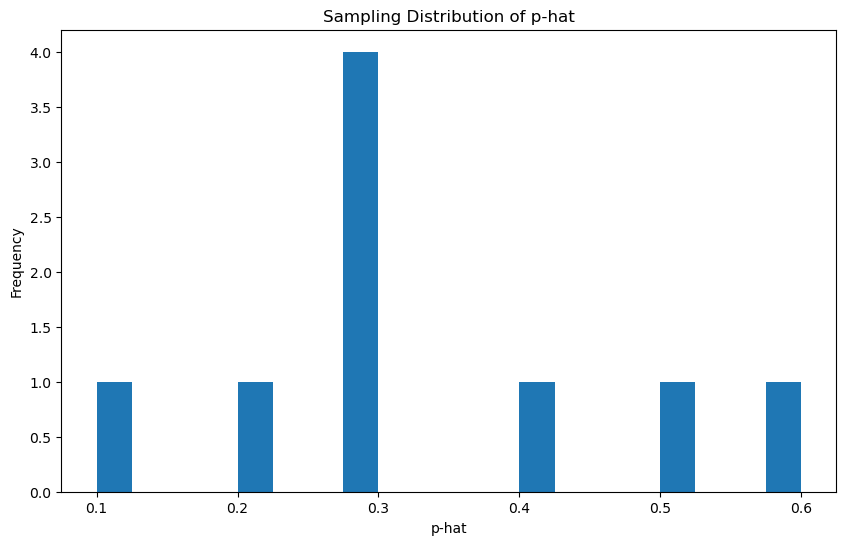

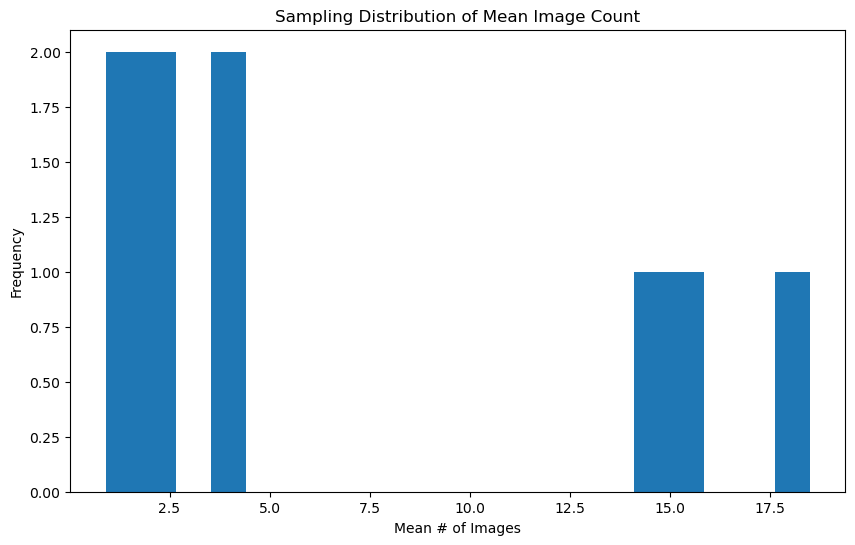

===== Sampling-distribution (empirical) results =====
Number of samples (k): 9
Mean of p_hat (p̄): 0.3333
SD of p_hat (sampling distribution): 0.1500
Empirical SE (sd of p_hat): 0.1500
95% z-score: 1.96
Margin of Error (empirical): 0.2940
95% CI (empirical): [0.0393, 0.6273]

===== Single-sample (theoretical) comparison =====
Assumed sample size (n): 10
Theoretical SE = sqrt(p*(1-p)/n) using p̄: 0.1491
Margin of Error (theoretical, 95%): 0.2922
95% CI (theoretical): [0.0412, 0.6255]



In [6]:
import requests
import pandas as pd
import random
import matplotlib.pyplot as plt

url = "https://en.wikipedia.org/w/api.php"

headers = {
    "User-Agent": "StatisticsEducationBot/1.0 (Class Project; educational use)"
}

# ------------------------------------------------
# Get many animal pages at once
# ------------------------------------------------
def get_animal_pages():
    params = {
        "action": "query",
        "list": "categorymembers",
        "cmtitle": "Category:Animals",
        "cmlimit": "500",
        "format": "json"
    }
    response = requests.get(url, params=params, headers=headers).json()
    return response["query"]["categorymembers"]

animal_pages = get_animal_pages()

# ------------------------------------------------
# Count images in a page
# ------------------------------------------------
def count_images(pageid):
    params = {
        "action": "query",
        "pageids": pageid,
        "prop": "images",
        "imlimit": "max",
        "format": "json"
    }
    data = requests.get(url, params=params, headers=headers).json()
    page = data["query"]["pages"][str(pageid)]
    images = page.get("images", [])
    return len(images)


# ------------------------------------------------
# Function to take ONE sample of size n=10
# ------------------------------------------------
def take_sample():
    sample_pages = random.sample(animal_pages, 10)
    results = []

    for page in sample_pages:
        img_count = count_images(page["pageid"])
        results.append({
            "image_count": img_count,
            "has_2_or_more_images": img_count >= 2
        })

    df_sample = pd.DataFrame(results)
    p_hat = df_sample["has_2_or_more_images"].mean()
    mean_img = df_sample["image_count"].mean()

    return p_hat, mean_img


# ------------------------------------------------
# Repeated sampling until margin of error ≤ 10%
# ------------------------------------------------
sample_stats = []
margin_of_error = 1  # start too high
z = 1.96  # 95% confidence

while margin_of_error > 0.10:
    p_hat, mean_img = take_sample()
    sample_stats.append({"p_hat": p_hat, "mean_images": mean_img})

    df_stats = pd.DataFrame(sample_stats)

    # Standard error of p-hat
    se = df_stats["p_hat"].std() / (len(df_stats)**0.5)

    # Margin of error
    margin_of_error = z * se if se == se else 1  # avoids NaN

    print(f"Samples collected: {len(df_stats)}, Current MOE: {margin_of_error:.4f}")

print("\nMargin of error goal reached!")
df_stats

print("===== FINAL DATAFRAME =====")
display(df_stats)

plt.figure(figsize=(10,6))
plt.hist(df_stats["p_hat"], bins=20)
plt.title("Sampling Distribution of p-hat")
plt.xlabel("p-hat")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,6))
plt.hist(df_stats["mean_images"], bins=20)
plt.title("Sampling Distribution of Mean Image Count")
plt.xlabel("Mean # of Images")
plt.ylabel("Frequency")
plt.show()

import numpy as np
import scipy.stats as st  # optional, only used for t if you want

# ---- ensure df_stats exists and has p_hat ----
# display(df_stats.head())

# 1) Empirical standard error of sampling distribution (sd of p_hat)
p_hats = df_stats["p_hat"].to_numpy()
p_mean = p_hats.mean()
sd_p_hat = p_hats.std(ddof=1)   # sample standard deviation of the sampling distribution
se_empirical = sd_p_hat        # variability of p-hat across samples

# 95% z-score
z = 1.96

# 2) Margin of Error (empirical) and 95% CI (empirical)
moe_empirical = z * se_empirical
ci_lower_emp = p_mean - moe_empirical
ci_upper_emp = p_mean + moe_empirical

# 3) Theoretical SE for a single sample of size n (n = sample size used, e.g. 10)
n = 10
# use p_mean as estimate of p for the formula
se_theoretical = np.sqrt(p_mean * (1 - p_mean) / n)
moe_theoretical = z * se_theoretical
ci_lower_theo = p_mean - moe_theoretical
ci_upper_theo = p_mean + moe_theoretical

# ---- Print everything clearly ----
print("===== Sampling-distribution (empirical) results =====")
print(f"Number of samples (k): {len(p_hats)}")
print(f"Mean of p_hat (p̄): {p_mean:.4f}")
print(f"SD of p_hat (sampling distribution): {sd_p_hat:.4f}")
print(f"Empirical SE (sd of p_hat): {se_empirical:.4f}")
print(f"95% z-score: {z}")
print(f"Margin of Error (empirical): {moe_empirical:.4f}")
print(f"95% CI (empirical): [{ci_lower_emp:.4f}, {ci_upper_emp:.4f}]\n")

print("===== Single-sample (theoretical) comparison =====")
print(f"Assumed sample size (n): {n}")
print(f"Theoretical SE = sqrt(p*(1-p)/n) using p̄: {se_theoretical:.4f}")
print(f"Margin of Error (theoretical, 95%): {moe_theoretical:.4f}")
print(f"95% CI (theoretical): [{ci_lower_theo:.4f}, {ci_upper_theo:.4f}]\n")

# Answer:
Based on my sampling distribution, I estimate that about one-third of Wikipedia animal articles contain two or more images. Across my repeated samples, the mean sample proportion was p̄ = 0.3333, meaning roughly 33% of sampled articles had at least two images. To assess the reliability of this estimate, I examined the variability of the sampling distribution: the empirical standard error was 0.1500, which indicates notable spread in the sample proportions because each sample only contained 10 articles. Using this standard error, the 95% margin of error is 0.2940, which produces a 95% confidence interval of [0.0393, 0.6273]. This interval is wide, reflecting the small sample size, but it still provides useful information: I can be 95% confident that the true proportion of Wikipedia animal articles with two or more images lies somewhere between about 4% and 63%. Because the empirical standard error closely matches the theoretical standard error (0.1491) expected under normality, the sampling distribution behaves approximately normally, supporting the validity of the confidence interval. Overall, the data suggests that roughly one-third of animal articles include two or more images, though the uncertainty is large due to limited sample size.